###  Establishing connection between cx_Oracle to Jupyter using the package: !pip install cx_Oracle

In [1]:
!pip install cx_Oracle

### Connected to the oracle_client reading the library directory 

In [2]:
import cx_Oracle
cx_Oracle.init_oracle_client(lib_dir= r"C:\Users\rp1608d\OneDrive - University of Greenwich\Data Warehouse & BI\Connect to Oracle via Python - using cx_Oracle library\instantclient-basic-windows.x64-21.3.0.0.0\instantclient_21_3")

### Connected to host ‘obiwan’ using the credentials user and password

In [3]:
my_username = "rp1608d"
my_password = "rp1608d"

connection = cx_Oracle.connect(user=my_username, password=my_password, dsn="OBIWAN")

### Importing libraries 

In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

### Validating the data using cursor and queries

In [5]:
my_cursor = connection.cursor()

# the results of the query is stored in row object
my_cursor.execute('select * from DIM_DETERMINAND') 

for row in my_cursor:
    print (row[0], '-', row[1])  

#connection.close()

61 - pH
6051 - Iron - as Fe
6462 - Nickel - Ni
664 - Oil & Grs Vs
5561 - m-Cresol
237 - Magnesium-Mg
177 - Fluoride - F
6050 - Manganse-Mn
301 - C - Org Filt
6058 - Antimony -Sb
8997 - ATRZ-ISOPR
3009 - Terbutryne
723 - Diazinon
9773 - PCB Con 153
6049 - Selenium -Se
8804 - ATRZ-ETHYL
483 - Aldrin
3269 - 11DClEthan
487 - HCH Alpha
6534 - 1,1,1,2 -TET
9073 - Carbetamide
577 - Chlrdn-cs/Z/
3792 - Benazolin
527 - Heptachlor
9756 - Neburon
3282 - BROMO-DCM
6615 - Chlorothalnl
6640 - Fenchlorphos
559 - TDE (PP)
1119 - ParathionMyl
3925 - Monolinuron
3555 - Triclopyr
3551 - Dichlorprop
7154 - ETHOFUMESATE
9477 - Dichlobenil
6045 - As-Filtered
9589 - DrySolids30C
3299 - DiClMe
192 - Phosphate
6724 - DEHP
9446 - Ba- Filtered
3290 - Chlorobenzen
9344 - Aldicarb
6972 - Methomyl
6971 - Methiocarb
3086 - Carbofuran
6619 - Cr Hex Filt
8680 - Lipid tot ww
180 - Orthophospht
7852 - Fe DW <63
9816 - 24Dichloropl
9815 - 4ClPhenol
6512 - Visit-NoBott
3169 - pH in-situ
6062 - Barium - Ba
6030 - Silver - 

### Selecting Water Sensor
DETERMINANDLABEL = 'Ammonia(N)'
or DETERMINANDNOTATION = '111'

In [6]:
from pandas import DataFrame

#sql query with the required columns
with connection.cursor() as cursor:
    cursor.execute("""select f.samplesampledmaterialtypelabel as Sample_Material_Type, T.year, ROUND(AVG(F.result),2) as Average_Result_Per_Year from dim_determinand D, fact_watersensor F, dim_time T
where d.determinandlabel = 'Ammonia(N)' and f.determinandnotation = d.determinandnotation and T.time_id = f.time_id 
group by T.year, f.samplesampledmaterialtypelabel order by T.year""")
    df = DataFrame(cursor.fetchall())
    df.columns = [x[0] for x in cursor.description]
    print("Total sample considered is %d " % len(df))

Total sample considered is 50 


### display df

In [7]:
df

,SAMPLE_MATERIAL_TYPE,YEAR,AVERAGE_RESULT_PER_YEAR
0,ANY TRADE EFFLUENT,2000,0.57
1,FINAL SEWAGE EFFLUENT,2000,15.38
2,RIVER / RUNNING SURFACE WATER,2000,0.09
3,ANY TRADE EFFLUENT,2001,0.87
4,FINAL SEWAGE EFFLUENT,2001,9.93
5,RIVER / RUNNING SURFACE WATER,2001,0.10
6,ANY TRADE EFFLUENT,2002,0.54
7,FINAL SEWAGE EFFLUENT,2002,25.33
8,RIVER / RUNNING SURFACE WATER,2002,0.36
9,ANY TRADE EFFLUENT,2003,0.72


### Label Encoding

changing Categorical values into quantitative values

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['SAMPLE_MATERIAL_TYPE'] = le.fit_transform(df['SAMPLE_MATERIAL_TYPE'])
df

,SAMPLE_MATERIAL_TYPE,YEAR,AVERAGE_RESULT_PER_YEAR
0,1,2000,0.57
1,3,2000,15.38
2,6,2000,0.09
3,1,2001,0.87
4,3,2001,9.93
5,6,2001,0.10
6,1,2002,0.54
7,3,2002,25.33
8,6,2002,0.36
9,1,2003,0.72


### DATA SPLITTING - features (independent) and targets (dependent)

In [9]:
X = df.iloc[:,:-1].values  #independent variable array
y = df.iloc[:,2].values  #dependent variable vector

In [10]:
X

array([[1, '2000'],
       [3, '2000'],
       [6, '2000'],
       [1, '2001'],
       [3, '2001'],
       [6, '2001'],
       [1, '2002'],
       [3, '2002'],
       [6, '2002'],
       [1, '2003'],
       [3, '2003'],
       [5, '2003'],
       [6, '2003'],
       [1, '2004'],
       [3, '2004'],
       [6, '2004'],
       [1, '2005'],
       [3, '2005'],
       [6, '2005'],
       [1, '2006'],
       [3, '2006'],
       [6, '2006'],
       [1, '2007'],
       [3, '2007'],
       [5, '2007'],
       [6, '2007'],
       [7, '2007'],
       [3, '2008'],
       [6, '2008'],
       [3, '2009'],
       [6, '2009'],
       [3, '2010'],
       [6, '2010'],
       [1, '2011'],
       [3, '2011'],
       [6, '2011'],
       [3, '2012'],
       [6, '2012'],
       [0, '2013'],
       [3, '2013'],
       [6, '2013'],
       [3, '2014'],
       [4, '2014'],
       [6, '2014'],
       [0, '2015'],
       [3, '2015'],
       [6, '2015'],
       [2, '2016'],
       [3, '2016'],
       [6, '2016']],

In [11]:
y

array([ 0.57, 15.38,  0.09,  0.87,  9.93,  0.1 ,  0.54, 25.33,  0.36,
        0.72, 14.09,  0.67,  0.07,  0.84, 14.26,  0.11,  0.56, 19.  ,
        0.04,  1.12, 11.24,  0.04,  0.84,  6.3 ,  0.38,  0.09,  0.03,
        7.46,  0.11,  1.94,  0.06, 10.86,  0.05,  0.68, 13.06,  0.13,
        7.96,  0.05,  1.5 ,  7.85,  0.08,  1.14,  0.03,  0.09,  6.8 ,
        2.1 ,  0.16,  0.03,  2.54,  0.09])

### Split dataset into the test and train set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

### Fitting linear regression model into the training set
From sklearn’s linear model library, import linear regression class. Create an object for a linear regression class called regr.

To fit the regressor into the training set, we will call the fit method – function to fit the regr into the training set.

We need to fit X_train (training data of matrix of features) into the target values y_train. Thus the model learns the correlation and learns how to predict the dependent variables based on the independent variable.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train) 
print(regr.intercept_)
print(regr.coef_)

113.1701538725893
[-0.60720989 -0.05389944]


### Predicting the test set results
We create a vector containing all the predictions of the test set results. The predicted results are then put into the vector called y_pred.(contains prediction for all observations in the test set)

predict method makes the predictions for the test set. Hence, the input is the test set. The parameter for predict must be an array or sparse matrix, hence input is X_test.

### Note that:
- y_test is the real result of the test set.
- y_pred are the predicted result.

In [14]:
y_pred = regr.predict(X_test) 
print(y_pred)

[1.29681382 2.17352092 3.3879407  2.79504683 1.72800936 3.11844349
 4.67057594 3.0106446  4.38676271 3.49573959 4.17116494 1.13511549
 0.74350338 2.95674516 1.45851215 3.44184014 3.33404126]


In [15]:
print(y_test)


[ 0.11  0.67 14.09  1.14  0.09  7.46  1.5  10.86  0.84  9.93  0.68  0.13
  0.03 13.06  0.04 25.33 14.26]


## Visualizing the results
Let’s see what the results of the code will look like when we visualize it.


### Plotting the points (observations)
To visualize the data, we plot graphs using matplotlib. To plot real observation points ie plotting the real given values.

plt.scatter plots a scatter plot of the data. Parameters include:

## Sacttered Plot for the TRAIN

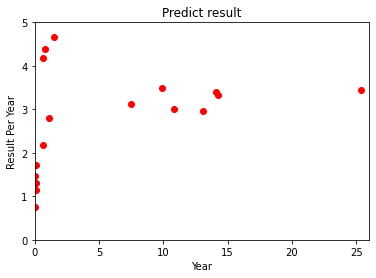

In [16]:
plt.scatter(y_test, y_pred, color='red') # plotting the observation line
plt.xlim(0,26)
plt.ylim(0,5,0.5)
plt.title("Predict result")
plt.xlabel("Year")
plt.ylabel("Result Per Year")
plt.show() # specifies end of graph

## Plot using seaborn

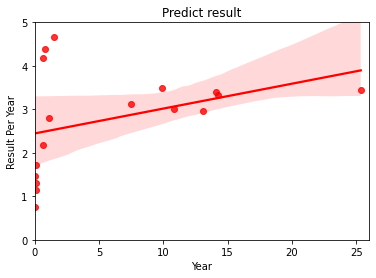

In [17]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred, color = 'red')
plt.title("Predict result")
 
plt.xlabel("Year")
plt.ylabel("Result Per Year")
plt.xlim(0,26)
plt.ylim(0,5,0.5)
plt.show()

## Evaluating the Obtained Result

For Linear regression, R2 score is used.
Unlike most other scores, R2 score may be negative.


In [18]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

-43.35973214840584